<a href="https://colab.research.google.com/github/fcoprata/text-recognize/blob/main/ocr_study3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -q easyocr
!git clone https://github.com/fcoprata/text-recognize

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 908.3/908.3 kB 13.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.2/307.2 kB 10.4 MB/s eta 0:00:00
Cloning into 'text-recognize'...
remote: Enumerating objects: 190, done.
remote: Counting objects: 100% (46/46), done.
remote: Compressing objects: 100% (41/41), done.
remote: Total 190 (delta 24), reused 16 (delta 5), pack-reused 144
Receiving objects: 100% (190/190), 51.43 MiB | 31.98 MiB/s, done.
Resolving deltas: 100% (56/56), done.


In [ ]:
import cv2
import easyocr

In [ ]:
artigo = cv2.imread('/content/text-recognize/Imagens/artigo.jpg')
leitor = easyocr.Reader(lang_list=['pt'], gpu=True)
texto = leitor.readtext(image=artigo, detail=0)
texto

Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete

['07/10/2022 13.58',
 'Lidando com',
 'desbalanceamento de dados',
 'Alura',
 'Autores: Ana Clara_de_Andrade Mioto, João_Vitor de Miranda',
 'Sthefanie Monica',
 'Premebida',
 'Em problemas de modelagem supervisionada focada em classificação; podemos nos',
 'deparar com bases de dados em que a variável alvo contenha classes muito',
 'desbalanceadas, isto é, contendo categorias com frequências muito diferentes.',
 'Ao treinar um modelo de classificação com',
 'variável desbalanceada; encontraremos',
 'alguns problemas. Isso acontece porque 0 padrão dos dados para',
 'a classe dominante',
 'vai se sobressair em relação aos da classe com menor frequência. Geralmente; nas',
 'bases de dados que possuem',
 'variável alvo desbalanceada, a classe com menor',
 'frequência é justamente',
 'que temos interesse em prever, 0 que torna os problemas',
 'ainda maiores.',
 'Como uma das classes tem',
 'frequência muito grande, 0 modelo construído utilizando',
 'dados desbalanceados pode apresentar acu

In [ ]:
texto = leitor.readtext(image = artigo, detail = 0, paragraph = True)
texto

['07/10/2022 13.58',
 'Lidando com desbalanceamento de dados Alura',
 'Autores: Ana Clara_de_Andrade Mioto, João_Vitor de Miranda Sthefanie Monica Premebida',
 'Em problemas de modelagem supervisionada focada em classificação; podemos nos deparar com bases de dados em que a variável alvo contenha classes muito desbalanceadas, isto é, contendo categorias com frequências muito diferentes.',
 'Ao treinar um modelo de classificação com variável desbalanceada; encontraremos alguns problemas. Isso acontece porque 0 padrão dos dados para a classe dominante vai se sobressair em relação aos da classe com menor frequência. Geralmente; nas bases de dados que possuem variável alvo desbalanceada, a classe com menor frequência é justamente que temos interesse em prever, 0 que torna os problemas ainda maiores.',
 'Como uma das classes tem frequência muito grande, 0 modelo construído utilizando dados desbalanceados pode apresentar acurácia bem elevada e ainda assim não prever corretamente nenhuma obse

In [8]:
placa = cv2.imread('/content/text-recognize/Imagens/placa_rua.png')
resultado = leitor.readtext(image=placa)
resultado

[([[167, 125], [217, 125], [217, 167], [167, 167]], 'Rua', 0.9802815780798327),
 ([[225, 143], [329, 143], [329, 207], [225, 207]],
  'Felipe',
  0.8989084460747417),
 ([[524, 198], [610, 198], [610, 246], [524, 246]], 'Rua', 0.9995434254973578),
 ([[608, 242], [859, 242], [859, 316], [608, 316]],
  'Gustavo',
  0.9642689958264494),
 ([[163, 327], [205, 327], [205, 345], [163, 345]],
  'Preleilura',
  0.40402217774832805),
 ([[616, 309], [849, 309], [849, 396], [616, 396]],
  'Krieger',
  0.9999904028704782),
 ([[512, 410], [593, 410], [593, 431], [512, 431]],
  'Prefeitura',
  0.9991616342609655),
 ([[510, 425], [593, 425], [593, 446], [510, 446]],
  'Municipal',
  0.7308443624104698),
 ([[139, 437], [347, 437], [347, 473], [139, 473]],
  'cerc Rcnosn',
  0.008300876599618048),
 ([[511, 443], [533, 443], [533, 457], [511, 457]], 'de', 0.9988257379556188),
 ([[532, 440], [593, 440], [593, 461], [532, 461]],
  'Brusque',
  0.9999717492097125),
 ([[834, 426], [955, 426], [955, 465], [834

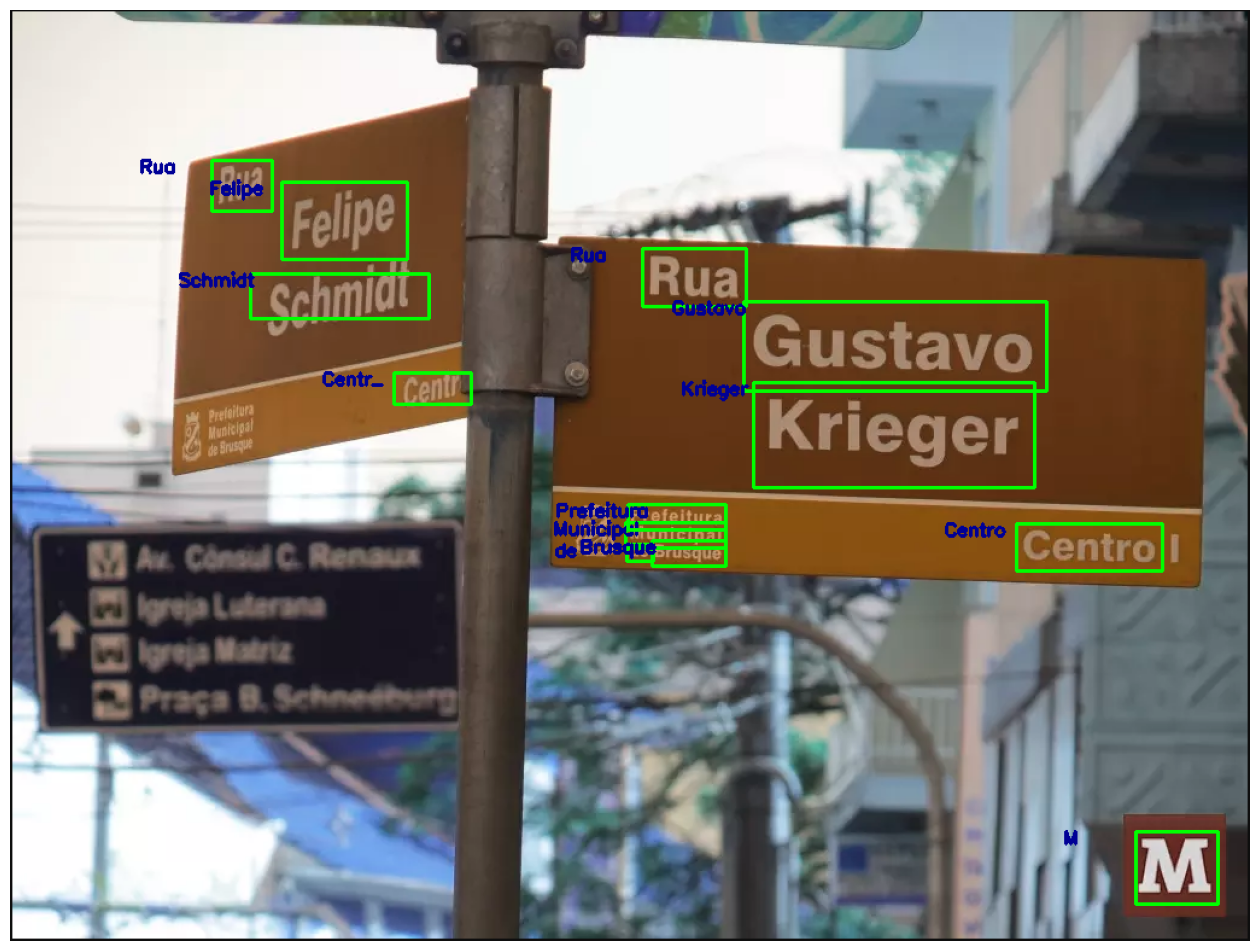

In [11]:
import matplotlib.pyplot as plt

for (coordenadas, texto, probabilidade) in resultado:
  if probabilidade >= 0.85:
    (sup_esq, sup_dir, inf_dir, inf_esq) = coordenadas
    sup_esq = (int(sup_esq[0]), int(sup_esq[1]))
    sup_dir = (int(sup_dir[0]), int(sup_dir[1]))
    inf_dir = (int(inf_dir[0]), int(inf_dir[1]))
    inf_esq = (int(inf_esq[0]), int(inf_esq[1]))
    cv2.rectangle(placa, sup_esq, inf_dir, (0,255,0),2)
    cv2.putText(placa, texto, (sup_esq[0]-60, sup_esq[1]+10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,0,150),2)
plt.figure(figsize = (16,16))
plt.axis('off')
plt.imshow(placa)